# **Capstone Project Title: Diabetes Prediction and Prevention**

# *Variable classes: CDC_BRFSS Code Book*



**Problem Statement:** 

The objective of this project is to develop a classification model that can predict whether a person is likely to have diabetes or not based on certain risk factors.

**Dataset and source:** 

The dataset is from the CDC's 2021 Behavioral Risk Factor Surveillance System (BRFSS) surveys available on the [CDC](https://www.cdc.gov/brfss/annual_data/annual_2021.html '2021 BRFSS Survey Data and Documentation') website as a xpt file. It contains various health measurements of American adults from all 50 states and U.S territories obtained via landline and cellphone surveys. 

It's a large dateset with 303 columns and 438693. The project focuses on variables that increase the risk for diabetes per available [literature](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9536939/#B20 'Detecting High-Risk Factors and Early Diagnosis of Diabetes Using Machine Learning Methods'). 
Variables of interest include: Diabetes, BMI, smoking_status, physical activity levels, alcohol consumption, general health, physical health, mental health, sex, age, race, education, hypertension, high_cholesterol and income 

**Data Quality:**

The CDC's BRFSS (Behavioral Risk Factor Surveillance System) is a survey conducted by the Centers for Disease Control and Prevention (CDC) in the United States. It collects data on various health-related behaviors, chronic conditions, and use of preventive services. Summarizing the entire BRFSS dataset would be a complex task due to its extensive nature and the wide range of variables it covers. However, I can provide you with a general overview of the BRFSS and its key findings. 

The BRFSS survey gathers information from a large sample of adults through telephone interviews, covering topics such as:

1. Health Behaviors: The BRFSS collects data on behaviors that impact health, including smoking, physical activity, alcohol consumption, diet, and seatbelt use.

2. Chronic Conditions: It includes questions on the prevalence of chronic health conditions, such as diabetes, hypertension, obesity, asthma, heart disease, and mental health disorders.

3. Preventive Services: The BRFSS assesses the utilization of preventive services, such as cancer screenings (mammograms, colonoscopies), flu vaccinations, and routine check-ups.

4. Demographics: The survey captures demographic information, including age, gender, race/ethnicity, education, income, and employment status.

5. Access to Healthcare: It explores factors related to healthcare access, health insurance coverage, and barriers to obtaining necessary medical care.

Through the analysis of BRFSS data, the CDC and researchers gain insights into the health status of the U.S. population, identify trends, and inform public health policies and interventions. The findings of the BRFSS are often published in reports and scientific articles.

To access specific data summaries or explore the BRFSS datasets in more detail, you can visit the CDC's BRFSS website: [CDC](https://www.cdc.gov/brfss/annual_data/annual_2021.html  'Behavioral Risk Factor Surveillance System'). The website provides access to data sets, reports, and interactive tools for exploring and analyzing BRFSS data.



## **Part 1a: Extract Transform Load (ETL)**



### 1. Data Loading, Exploration and Cleaning:

#### a. Exploring the BRFSS data

In [9]:
# Import the necessary libraries 
from sas7bdat import SAS7BDAT
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Ignore all warnings
warnings.filterwarnings("ignore")


Pandas, 'numpy, seaborn, and matplotlib are commonly used in data analysis and visualization tasks in Python. They provide functionality for data manipulation, numerical computations, and creating visually appealing plots and graphics. These libraries are widely used in the data science community and offer powerful tools to work with and analyze data.

In [10]:
# Load the dataset
df_brfss = pd.read_sas("/Users/justinmpanga/Desktop/Capstone_ADS/BRFSS2021.XPT ")

In [11]:
# Explore the dataset

print(df_brfss.head())
print(len(df_brfss))

   _STATE  FMONTH        IDATE IMONTH   IDAY    IYEAR  DISPCODE  \
0     1.0     1.0  b'01192021'  b'01'  b'19'  b'2021'    1100.0   
1     1.0     1.0  b'01212021'  b'01'  b'21'  b'2021'    1100.0   
2     1.0     1.0  b'01212021'  b'01'  b'21'  b'2021'    1100.0   
3     1.0     1.0  b'01172021'  b'01'  b'17'  b'2021'    1100.0   
4     1.0     1.0  b'01152021'  b'01'  b'15'  b'2021'    1100.0   

           SEQNO          _PSU  CTELENM1  ...  _FRTRES1  _VEGRES1  _FRUTSU1  \
0  b'2021000001'  2.021000e+09       1.0  ...       1.0       1.0     100.0   
1  b'2021000002'  2.021000e+09       1.0  ...       1.0       1.0     100.0   
2  b'2021000003'  2.021000e+09       1.0  ...       1.0       1.0     100.0   
3  b'2021000004'  2.021000e+09       1.0  ...       1.0       1.0     114.0   
4  b'2021000005'  2.021000e+09       1.0  ...       1.0       1.0     100.0   

   _VEGESU1  _FRTLT1A  _VEGLT1A  _FRT16A  _VEG23A      _FRUITE1      _VEGETE1  
0     214.0       1.0       1.0      1.0  

There are many columns. Next, I will select columns of interest, clean data and rename columns to make them user friendly. Column selection will be highly influenced by domain knowledge or existing literature on diabetes. 

#### b. Creating New Dataset: Retrieving Variables of Interest

In [12]:
# Selecting variables of interest from the BRFSS dataset
df = df_brfss[['_AGE_G', 'SEXVAR', '_IMPRACE','_EDUCAG', '_INCOMG1', '_RFSMOK3', 'DRNKANY5', '_BMI5CAT', 'GENHLTH', 'PHYSHLTH','MENTHLTH','_RFHYPE6', '_RFCHOL3', 'DIABETE4']]

- Using existing literature on diabetes and its risks
- Feature: age, sex, race, education, income, smoking status, alcohol consumption, body mass index (BMI), general health, physical health, mental health, hypertension, and cholesterol levels
- Outcome: diabetes diagnosis

In [13]:
# Explore the df
print(df.head())

   _AGE_G  SEXVAR  _IMPRACE  _EDUCAG  _INCOMG1  _RFSMOK3  DRNKANY5  _BMI5CAT  \
0     6.0     2.0       1.0      2.0       3.0       1.0       2.0       1.0   
1     6.0     2.0       2.0      4.0       9.0       1.0       2.0       NaN   
2     6.0     2.0       2.0      2.0       2.0       1.0       2.0       3.0   
3     5.0     2.0       1.0      2.0       5.0       1.0       1.0       4.0   
4     6.0     1.0       6.0      1.0       2.0       1.0       2.0       3.0   

   GENHLTH  PHYSHLTH  MENTHLTH  _RFHYPE6  _RFCHOL3  DIABETE4  
0      5.0      20.0      10.0       1.0       2.0       3.0  
1      3.0      88.0      88.0       2.0       2.0       1.0  
2      2.0      88.0      88.0       2.0       1.0       1.0  
3      2.0      88.0      10.0       2.0       2.0       1.0  
4      5.0      30.0      88.0       1.0       2.0       1.0  


#### **c. Cleaning, Renaming and Visualizing Variable Distributions**

The next part involves cleaning, visualizing and mapping variables. Mapping is based on the CDC's 2021 Codebook meaning that the variables used in the diabetes prediction project are aligned with the definitions and guidelines provided by the Centers for Disease Control and Prevention (CDC) in their Codebook for the year 2021. The CDC Codebook serves as a standardized reference document that provides detailed information about the variables and their corresponding values used in a particular dataset.

By mapping variables based on the CDC's 2021 Codebook, you adhere to standardized definitions and guidelines, allowing for consistency and comparability in data analysis and interpretation. It also facilitates collaboration and knowledge sharing among researchers and practitioners working in the field of diabetes prediction, as they can refer to the same set of variables and definitions provided by a reputable source like the CDC.

#### Target

'DIABETE4' changed to Diabetes_status

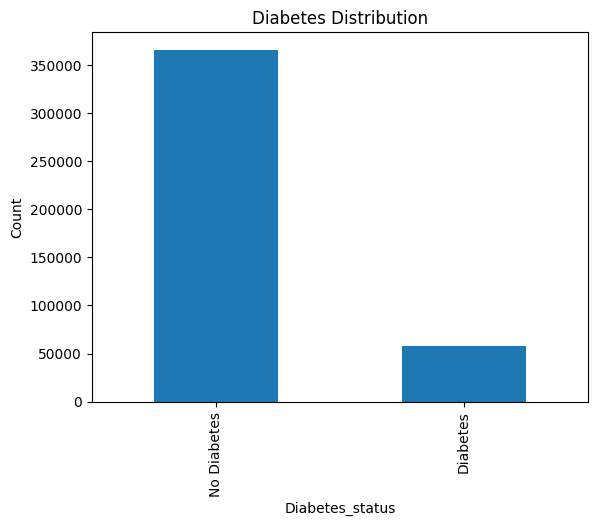

In [14]:
# Mapping dictionary for diabetes variable
diabetes_mapping = {1: 'Diabetes', 2: 'Gestational', 3: 'No Diabetes', 4: 'Pre-diabetes', 7: "Don't know", 9: 'Refused'}

# Renaming 'DIABETE4' column to 'Diabetes'
df = df.rename(columns={'DIABETE4': 'Diabetes_status'})

# Mapping diabetes values to their corresponding labels
df['Diabetes_status'] = df['Diabetes_status'].map(diabetes_mapping)

# Filtering out unwanted categories
df = df[(df['Diabetes_status'] != 'Gestational') & (df['Diabetes_status'] != 'Pre-diabetes') & (df['Diabetes_status'] != "Don't know") & (df['Diabetes_status'] != 'Refused')]

# Visualize the distribution of the target variable
df['Diabetes_status'].value_counts().plot(kind='bar')
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes_status')
plt.ylabel('Count')
plt.show()

#### Features

'SEXVAR' changed to Sex


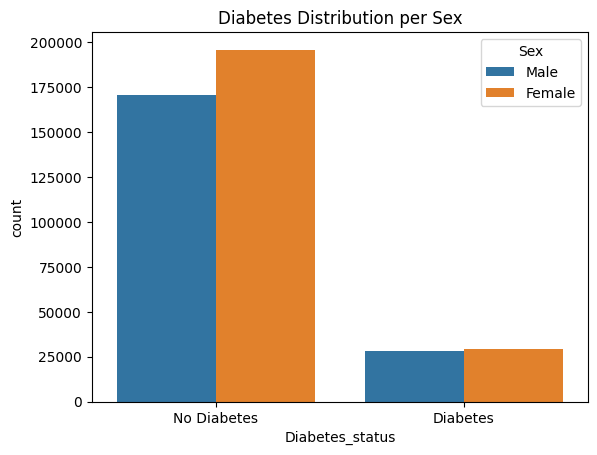

In [15]:

# Mapping dictionary for sex variable
sex_mapping = {1: 'Male', 2: 'Female'}

# Renaming 'SEXVAR' column to 'Sex'
df = df.rename(columns={'SEXVAR': 'Sex'})

# Mapping sex values to their corresponding labels
df['Sex'] = df['Sex'].map(sex_mapping)

# Convert 'Sex' column to categorical dtype
df['Sex'] = df['Sex'].astype(CategoricalDtype(categories=['Male', 'Female'], ordered=False))

# Plotting the count of 'Diabetes_status' variable with respect to 'Sex'
sns.countplot(x='Diabetes_status', hue='Sex', data=df)

# Displaying the plot
plt.title('Diabetes Distribution per Sex')
plt.show()

'_AGE_G' changed to Age

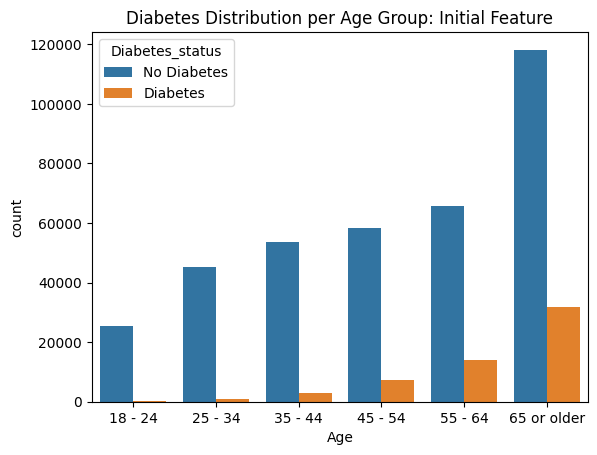

In [16]:

# Mapping dictionary for age variable
age_mapping = {1: '18 - 24', 2: '25 - 34', 3: '35 - 44', 4: '45 - 54', 5: '55 - 64', 6: '65 or older'}

# Renaming '_AGE_G' column to 'Age'
df = df.rename(columns={'_AGE_G': 'Age'})

# Mapping age values to their corresponding labels
df['Age'] = df['Age'].map(age_mapping)

# Convert 'Age' column to categorical dtype
df['Age'] = df['Age'].astype(CategoricalDtype(categories=['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65 or older'], ordered=False))

# Plotting the count of 'Age' variable with respect to 'Diabetes_status'
sns.countplot(x='Age', hue='Diabetes_status', data=df)

# Displaying the plot
plt.title('Diabetes Distribution per Age Group: Initial Feature')
plt.show()

'_IMPRACE' changed to Race 


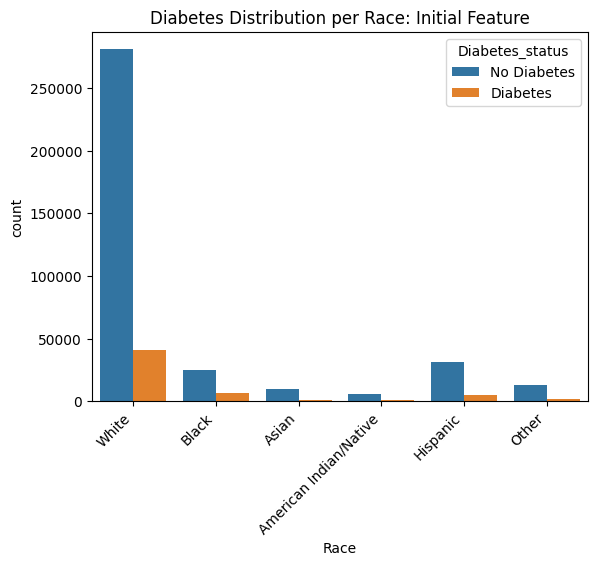

In [17]:
# Mapping dictionary for race variable
race_mapping = {1: 'White', 2: 'Black', 3: 'Asian', 4: 'American Indian/Native', 5: 'Hispanic', 6: 'Other'}

# Renaming '_IMPRACE' column to 'Race'
df = df.rename(columns={'_IMPRACE': 'Race'})

# Mapping race values to their corresponding labels
df['Race'] = df['Race'].map(race_mapping)

# Convert 'Race' column to categorical dtype
df['Race'] = df['Race'].astype(CategoricalDtype(categories=['White', 'Black', 'Asian', 'American Indian/Native', 'Hispanic', 'Other'], ordered=False))

# Plotting the count of 'Race' variable with respect to 'Diabetes_status'
ax = sns.countplot(x='Race', hue='Diabetes_status', data=df)

# Rotating x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Displaying the plot
plt.title('Diabetes Distribution per Race: Initial Feature')
plt.show()


'_EDUCAG' changed to Education


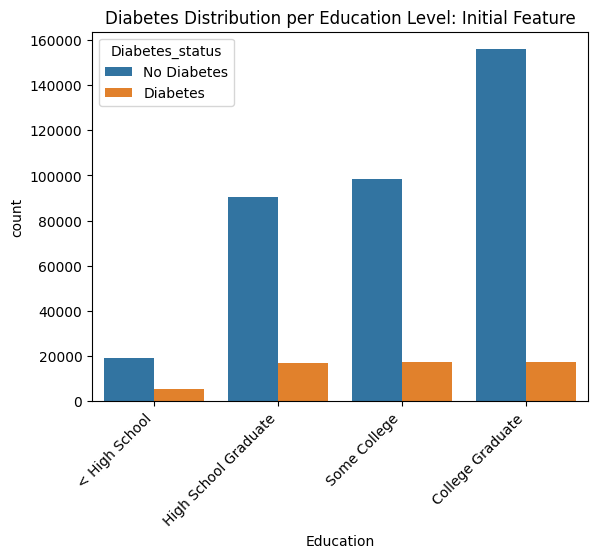

In [18]:
# Mapping dictionary for education variable
education_mapping = {1: '< High School', 2: 'High School Graduate', 3: 'Some College', 4: 'College Graduate', 9: "Don't know"}

# Renaming '_EDUCAG' column to 'Education'
df = df.rename(columns={'_EDUCAG': 'Education'})

# Mapping education values to their corresponding labels
df['Education'] = df['Education'].map(education_mapping)

# Filtering out the "Don't know" category
df = df[df['Education'] != "Don't know"]

# Convert 'Education' column to categorical dtype
df['Education'] = df['Education'].astype(CategoricalDtype(categories=['< High School', 'High School Graduate', 'Some College', 'College Graduate'], ordered=False))

# Plotting the count of 'Education' variable with respect to 'Diabetes_status'
ax = sns.countplot(x='Education', hue='Diabetes_status', data=df)

# Rotating x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Displaying the plot
plt.title('Diabetes Distribution per Education Level: Initial Feature')
plt.show()


'_INCOMG1' changed to Income 


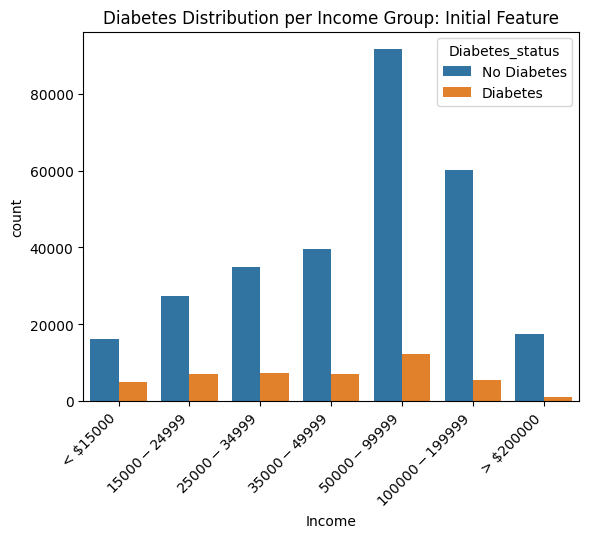

In [19]:
# Mapping dictionary for income variable
income_mapping = {1: '< $15000', 2: '$15000 - $24999', 3: '$25000 - $34999', 4: '$35000 - $49999', 5: '$50000 - $99999', 6: '$100000 - $199999', 7: '> $200000',9: "Don't know"}

# Renaming '_INCOMG' column to 'Income'
df = df.rename(columns={'_INCOMG1': 'Income'})

# Mapping income values to their corresponding labels
df['Income'] = df['Income'].map(income_mapping)

# Filtering out the "Don't know" category
df = df[df['Income'] != "Don't know"]

# Convert 'Income' column to categorical dtype
df['Income'] = df['Income'].astype(CategoricalDtype(categories=['< $15000', '$15000 - $24999', '$25000 - $34999', '$35000 - $49999', '$50000 - $99999', '$100000 - $199999', '> $200000'], ordered=False))

# Plotting the count of 'Income' variable with respect to 'Diabetes_status'
ax = sns.countplot(x='Income', hue='Diabetes_status', data=df)

# Rotating x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Displaying the plot
plt.title('Diabetes Distribution per Income Group: Initial Feature')
plt.show()


'_RFSMOK3'changed to Smoking_status


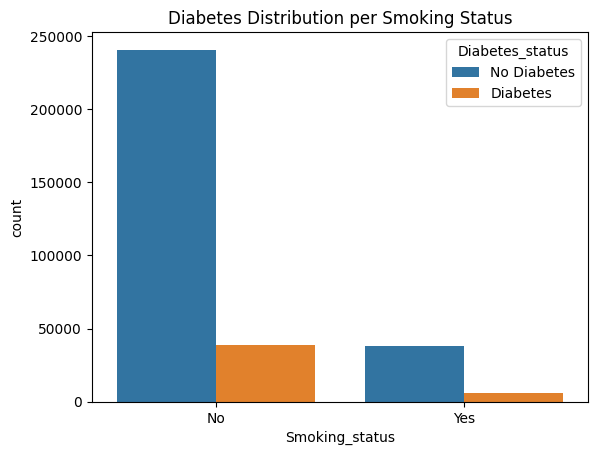

In [20]:

# Mapping dictionary for smoking status variable
smoking_mapping = {1: 'No', 2: 'Yes', 9: "Don't know"}

# Renaming '_RFSMOK3' column to 'Smoking_status'
df = df.rename(columns={'_RFSMOK3': 'Smoking_status'})

# Mapping smoking status values to their corresponding labels
df['Smoking_status'] = df['Smoking_status'].map(smoking_mapping)

# Filtering out the "Don't know" category
df = df[df['Smoking_status'] != "Don't know"]

# Convert 'Smoking_status' column to categorical dtype
df['Smoking_status'] = df['Smoking_status'].astype(CategoricalDtype(categories=['No', 'Yes'], ordered=False))

# Plotting the count of 'Smoking_status' variable with respect to 'Diabetes_status'
sns.countplot(x='Smoking_status', hue='Diabetes_status', data=df)

# Displaying the plot
plt.title('Diabetes Distribution per Smoking Status')
plt.show()


'DRNKANY5' changed to Alcohol_consumption 


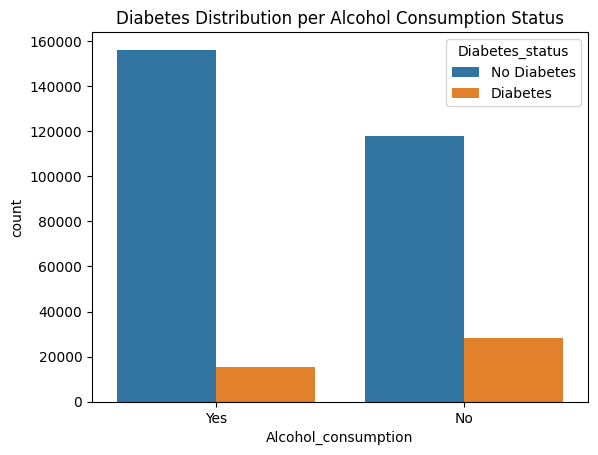

In [21]:

# Mapping dictionary for alcohol consumption variable
alcohol_mapping = {1: 'Yes', 2: 'No', 7: "Don't know", 9: 'Refused'}

# Renaming 'DRNKANY5' column to 'Alcohol_consumption'
df = df.rename(columns={'DRNKANY5': 'Alcohol_consumption'})

# Filtering out the "Don't know" (7) and "Refused" (9) categories
df = df[(df['Alcohol_consumption'] != 7) & (df['Alcohol_consumption'] != 9)]

# Mapping alcohol consumption values to their corresponding labels
df['Alcohol_consumption'] = df['Alcohol_consumption'].map(alcohol_mapping)

# Convert 'Alcohol_consumption' column to categorical dtype
df['Alcohol_consumption'] = df['Alcohol_consumption'].astype(CategoricalDtype(categories=['Yes', 'No'], ordered=False))

# Plotting the count of 'Alcohol_consumption' variable with respect to 'Diabetes_status'
sns.countplot(x='Alcohol_consumption', hue='Diabetes_status', data=df)

# Displaying the plot
plt.title('Diabetes Distribution per Alcohol Consumption Status')
plt.show()


'_BMI5CAT' changed to BMI 


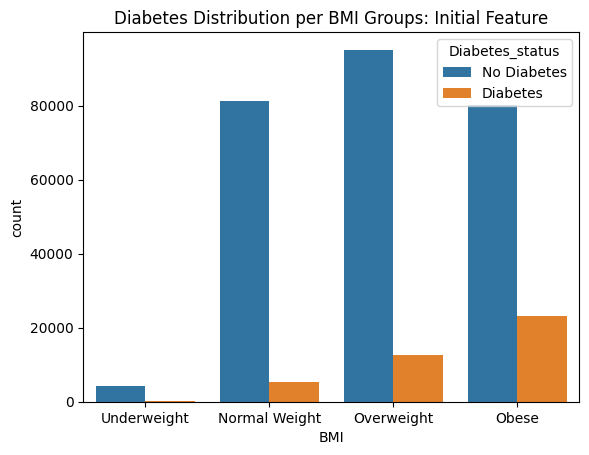

In [22]:

# Mapping dictionary for BMI categories
bmi_mapping = {1: 'Underweight', 2: 'Normal Weight', 3: 'Overweight', 4: 'Obese', '': "Don't know"}

# Renaming '_BMI5CAT' column to 'BMI'
df = df.rename(columns={'_BMI5CAT': 'BMI'})

# Removing blank values and converting them to NA
df['BMI'] = df['BMI'].replace('', pd.NA).dropna()

# Mapping BMI values to their corresponding labels
df['BMI'] = df['BMI'].map(bmi_mapping)

# Convert 'BMI' column to categorical dtype
df['BMI'] = df['BMI'].astype(CategoricalDtype(categories=['Underweight', 'Normal Weight', 'Overweight', 'Obese'], ordered=False))

# Plotting the count of 'BMI' variable with respect to 'Diabetes_status'
sns.countplot(x='BMI', hue='Diabetes_status', data=df)

# Displaying the plot
plt.title('Diabetes Distribution per BMI Groups: Initial Feature')
plt.show()

'GENHLTH' changed to General_health


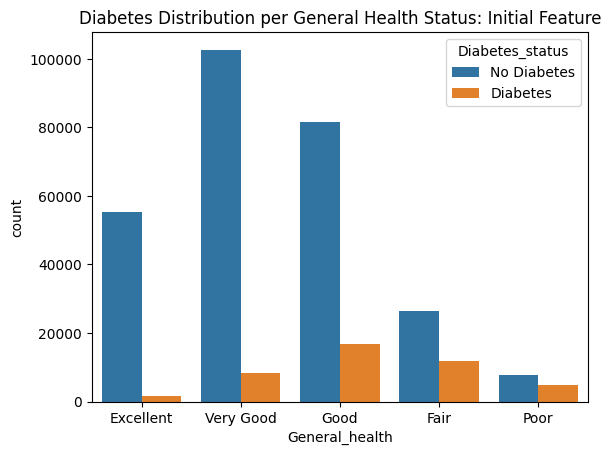

In [23]:

# Mapping dictionary for general health variable
ghealth_mapping = {1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor', 7: "Don't know", 9: 'Refused'}

# Renaming 'GENHLTH' column to 'General_health'
df = df.rename(columns={'GENHLTH': 'General_health'})

# Filtering out the "Don't know" (7) and "Refused" (9) categories
df = df[(df['General_health'] != 7) & (df['General_health'] != 9)]

# Mapping general health values to their corresponding labels
df['General_health'] = df['General_health'].map(ghealth_mapping)

# Convert 'General_health' column to categorical dtype
df['General_health'] = df['General_health'].astype(CategoricalDtype(categories=['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'], ordered=False))

# Plotting the count of 'General_health' variable with respect to 'Diabetes_status'
sns.countplot(x='General_health', hue='Diabetes_status', data=df)

# Displaying the plot
plt.title('Diabetes Distribution per General Health Status: Initial Feature')
plt.show()

'PHYSHLTH' changed to Physical_health


Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
- 1-30 = number of days
- 88 =  None

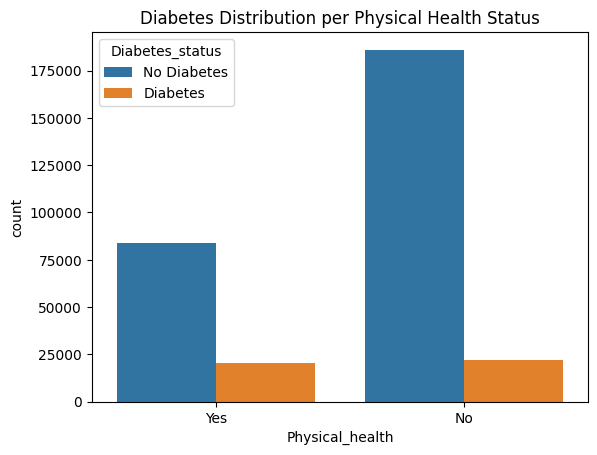

In [24]:
# Mapping dictionary for physical health variable
phealth_mapping = {}
for i in range(1, 31):
    phealth_mapping[i] = 'Yes'
phealth_mapping[88] = 'No'
phealth_mapping[77] = "Don't know"
phealth_mapping[99] = 'Refused'

# Renaming 'PHYSHLTH' column to 'Physical_health'
df = df.rename(columns={'PHYSHLTH': 'Physical_health'})

# Mapping physical health values to their corresponding labels
df['Physical_health'] = df['Physical_health'].map(phealth_mapping)

# Filtering out unwanted categories
df = df[(df['Physical_health'] != "Don't know") & (df['Physical_health'] != 'Refused')]

# Convert 'Physical_health' column to categorical dtype
df['Physical_health'] = df['Physical_health'].astype(CategoricalDtype(categories=['Yes', 'No'], ordered=False))

# Plotting the count of 'Physical_health' variable with respect to 'DIABETE4'
sns.countplot(x='Physical_health', hue='Diabetes_status', data=df)

# Displaying the plot
plt.title('Diabetes Distribution per Physical Health Status')
plt.show()

'MENTHLTH' changed to Mental_health

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? 
- 1-30 = number of days
- 88 =  None
 

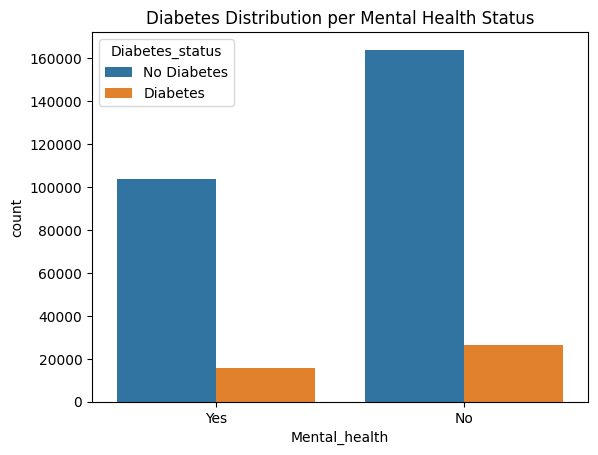

In [25]:
# Mapping dictionary for mental health variable
mhealth_mapping = {}
for i in range(1, 31):
    mhealth_mapping[i] = 'Yes'
mhealth_mapping[88] = 'No'
mhealth_mapping[77] = "Don't know"
mhealth_mapping[99] = 'Refused'

# Renaming 'MENTHLTH' column to 'Mental_health'
df = df.rename(columns={'MENTHLTH': 'Mental_health'})

# Mapping mental health values to their corresponding labels
df['Mental_health'] = df['Mental_health'].map(mhealth_mapping)

# Filtering out unwanted categories
df = df[(df['Mental_health'] != "Don't know") & (df['Mental_health'] != 'Refused')]

# Convert 'Mental_health' column to categorical dtype
from pandas.api.types import CategoricalDtype
df['Mental_health'] = df['Mental_health'].astype(CategoricalDtype(categories=['Yes', 'No'], ordered=False))

# Plotting the count of 'Mental_health' variable with respect to 'Diabetes_status'
sns.countplot(x='Mental_health', hue='Diabetes_status', data=df)

# Displaying the plot
plt.title('Diabetes Distribution per Mental Health Status')
plt.show()

'_RFHYPE6' changed to Hypertension

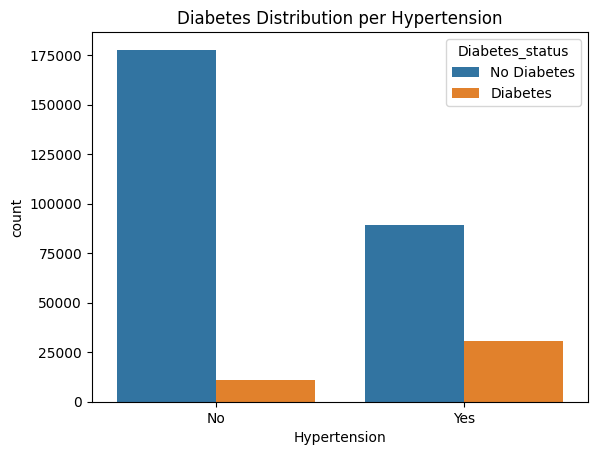

In [26]:
# Mapping dictionary for Hypertension variable
Hypertension_mapping = {1: 'No', 2: 'Yes', 9: "Don't know"}

# Renaming '_RFSMOK3' column to 'Smoking_status'
df = df.rename(columns={'_RFHYPE6': 'Hypertension'})

# Mapping smoking status values to their corresponding labels
df['Hypertension'] = df['Hypertension'].map(Hypertension_mapping)

# Filtering out the "Don't know" category
df = df[df['Hypertension'] != "Don't know"]

# Convert 'Smoking_status' column to categorical dtype
from pandas.api.types import CategoricalDtype
df['Hypertension'] = df['Hypertension'].astype(CategoricalDtype(categories=['No', 'Yes'], ordered=False))

# Plotting the count of 'Smoking_status' variable with respect to 'Diabetes_status'
sns.countplot(x='Hypertension', hue='Diabetes_status', data=df)

# Displaying the plot
plt.title('Diabetes Distribution per Hypertension')
plt.show()

'_RFCHOL3' changed to High_cholesterol

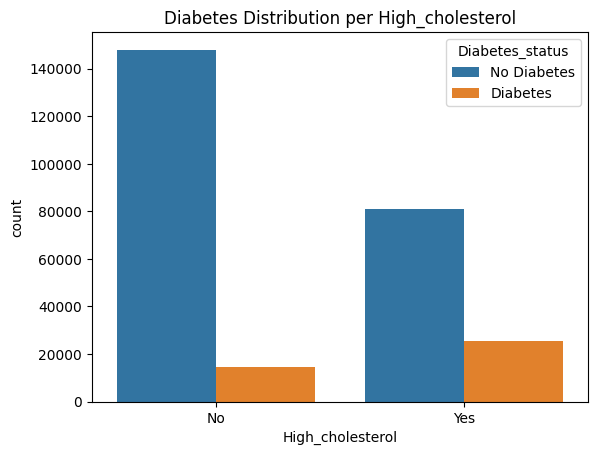

In [27]:
# Mapping dictionary for High_cholesterol variable
High_cholesterol_mapping = {1: 'No', 2: 'Yes', 9: "Don't know"}

# Renaming '_RFSMOK3' column to 'Smoking_status'
df = df.rename(columns={'_RFCHOL3': 'High_cholesterol'})

# Mapping smoking status values to their corresponding labels
df['High_cholesterol'] = df['High_cholesterol'].map(High_cholesterol_mapping)

# Filtering out the "Don't know" category
df = df[df['High_cholesterol'] != "Don't know"]

# Convert 'Smoking_status' column to categorical dtype
from pandas.api.types import CategoricalDtype
df['High_cholesterol'] = df['High_cholesterol'].astype(CategoricalDtype(categories=['No', 'Yes'], ordered=False))

# Plotting the count of 'Smoking_status' variable with respect to 'Diabetes_status'
sns.countplot(x='High_cholesterol', hue='Diabetes_status', data=df)

# Displaying the plot
plt.title('Diabetes Distribution per High_cholesterol')
plt.show()

#### d. Exploring Cleaned Data

In [28]:
# Checking consistency of non-null values across features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 307405 entries, 0 to 438692
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Age                  307405 non-null  category
 1   Sex                  307405 non-null  category
 2   Race                 307405 non-null  category
 3   Education            307405 non-null  category
 4   Income               307405 non-null  category
 5   Smoking_status       307405 non-null  category
 6   Alcohol_consumption  307405 non-null  category
 7   BMI                  292431 non-null  category
 8   General_health       307404 non-null  category
 9   Physical_health      307403 non-null  category
 10  Mental_health        307405 non-null  category
 11  Hypertension         307405 non-null  category
 12  High_cholesterol     268647 non-null  category
 13  Diabetes_status      307405 non-null  object  
dtypes: category(13), object(1)
memory usage: 8.5+ MB
None


In [29]:
# Dropping rows with null values and duplicate rows 
df = df.dropna()

In [30]:

# Checking consistency of non-null values across features, again!
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 255979 entries, 0 to 438692
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Age                  255979 non-null  category
 1   Sex                  255979 non-null  category
 2   Race                 255979 non-null  category
 3   Education            255979 non-null  category
 4   Income               255979 non-null  category
 5   Smoking_status       255979 non-null  category
 6   Alcohol_consumption  255979 non-null  category
 7   BMI                  255979 non-null  category
 8   General_health       255979 non-null  category
 9   Physical_health      255979 non-null  category
 10  Mental_health        255979 non-null  category
 11  Hypertension         255979 non-null  category
 12  High_cholesterol     255979 non-null  category
 13  Diabetes_status      255979 non-null  object  
dtypes: category(13), object(1)
memory usage: 7.1+ MB
None


#### e. Saving Cleaned Data

In [31]:
# saving cleaned 'categorical_data'
df.to_csv('a_BRFSS_Original_classes.csv', index=False)